In [38]:
# Read in our dataset from "Data_Preprocessing.ipynb" kernel
# This line should work if everything is setup correctly
knn_data = clean_data
knn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 1036146 to 717830
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Flow Duration      1048575 non-null  int64  
 2   TotLen Fwd Pkts    1048575 non-null  int64  
 3   Fwd Pkt Len Max    1048575 non-null  int64  
 4   Fwd Pkt Len Min    1048575 non-null  int64  
 5   Fwd Pkt Len Mean   1048575 non-null  float64
 6   Bwd Pkt Len Max    1048575 non-null  int64  
 7   Bwd Pkt Len Min    1048575 non-null  int64  
 8   Bwd Pkt Len Mean   1048575 non-null  float64
 9   Flow IAT Mean      1048575 non-null  float64
 10  Bwd IAT Tot        1048575 non-null  int64  
 11  Bwd IAT Mean       1048575 non-null  float64
 12  Bwd IAT Max        1048575 non-null  int64  
 13  Bwd IAT Min        1048575 non-null  int64  
 14  Fwd PSH Flags      1048575 non-null  int64  
 15  Pkt Len Var        1048575 

In [39]:
X = knn_data
y = knn_data["Label"].astype(int)
X = X.drop(columns="Label")

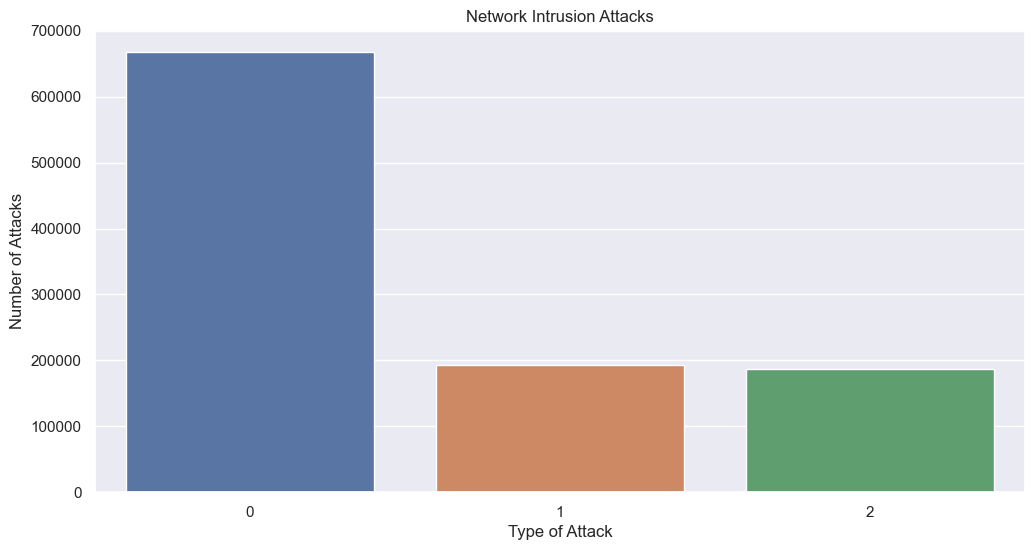

In [40]:
# Bar graph showing the same information as our pie chart
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Type of Attack')
ax = sns.countplot(x=y, data=knn_data)
ax.set(xlabel='Type of Attack', ylabel='Number of Attacks')
plt.title('Network Intrusion Attacks')
plt.show()

In [41]:
print(X.shape)
print(pd.DataFrame(X).describe())

(1048575, 24)
           Dst Port  Flow Duration  TotLen Fwd Pkts  Fwd Pkt Len Max  \
count  1.048575e+06   1.048575e+06     1.048575e+06     1.048575e+06   
mean   4.876262e+03   6.255555e+06     4.479936e+02     1.745736e+02   
std    1.444344e+04   1.260291e+09     1.573541e+04     2.876713e+02   
min    0.000000e+00  -9.190110e+11     0.000000e+00     0.000000e+00   
25%    2.200000e+01   7.000000e+00     0.000000e+00     0.000000e+00   
50%    5.300000e+01   1.023000e+03     3.600000e+01     3.400000e+01   
75%    4.430000e+02   4.066690e+05     4.550000e+02     1.990000e+02   
max    6.553300e+04   1.200000e+08     8.591554e+06     6.444000e+04   

       Fwd Pkt Len Min  Fwd Pkt Len Mean  Bwd Pkt Len Max  Bwd Pkt Len Min  \
count     1.048575e+06      1.048575e+06     1.048575e+06     1.048575e+06   
mean      8.389535e+00      3.879579e+01     3.325241e+02     2.016587e+01   
std       1.948279e+01      5.331882e+01     4.938587e+02     4.653823e+01   
min       0.000000e+00   

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(len(y))

(891288, 24) (157287, 24) (891288,) (157287,)
1048575


In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_train = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
#X_test = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

In [44]:
K = int(sqrt(len(y)-1))
print("K =", K)

K = 1023


In [45]:
# P=2 is for euclidean distance
knn = KNeighborsClassifier(n_neighbors=K, p=2, metric='euclidean')

In [46]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [47]:
knn.score(X_test, y_test)

0.9100688550229835

In [48]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[100026     59     59]
 [     0  29004      0]
 [ 14025      2  14112]]


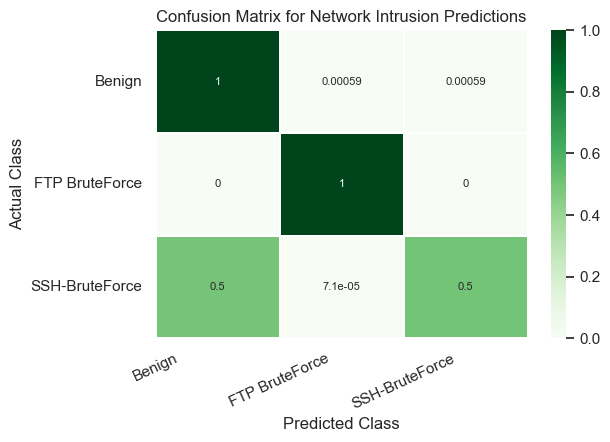

In [49]:
labels = ["Benign", "FTP BruteForce", "SSH-BruteForce"]
cm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(6, 4))
sns.set(font_scale=1)
sns.heatmap(cm, annot=True, annot_kws={'size':8}, cmap=plt.cm.Greens, linewidths=0.2)

tick_marks = np.arange(len(labels))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, labels, rotation=25)
plt.yticks(tick_marks2, labels, rotation=0)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Confusion Matrix for Network Intrusion Predictions')
plt.show()

In [50]:
print(f1_score(y_test, y_pred, average='weighted'))

0.8982053393334686


In [51]:
print(accuracy_score(y_test, y_pred))

0.9100688550229835


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100144
           1       1.00      1.00      1.00     29004
           2       1.00      0.50      0.67     28139

    accuracy                           0.91    157287
   macro avg       0.96      0.83      0.87    157287
weighted avg       0.92      0.91      0.90    157287

